In [1]:
# 1.0 Call libraries

import numpy as np
import pandas as pd
import os

# 1.1 Call sklearn libraries

# 1.1.1 Split data into train and test data
from sklearn.model_selection import train_test_split

# 1.1.2 PReprocessong:
#mu-sigma by sd.   standardize
from sklearn.preprocessing import StandardScaler

# 1.1.3 Import class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as dtree

# 1.1.4 To draw decision tree
from sklearn.tree import export_graphviz

# 1.1.7
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
os.chdir("C:\\Users\\user\\Desktop\\ML Files")

In [4]:
df = pd.read_csv('income_evaluation.csv')

In [5]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

In [8]:
df[' income']= label_encoder.fit_transform(df[' income'])

In [9]:
df['age']= label_encoder.fit_transform(df['age'])
df[' workclass']= label_encoder.fit_transform(df[' workclass'])
df[' fnlwgt']= label_encoder.fit_transform(df[' fnlwgt'])
df[' education']= label_encoder.fit_transform(df[' education'])
df[' marital-status']= label_encoder.fit_transform(df[' marital-status'])
df[' occupation']= label_encoder.fit_transform(df[' occupation'])
df[' relationship']= label_encoder.fit_transform(df[' relationship'])
df[' race']= label_encoder.fit_transform(df[' race'])
df[' sex']= label_encoder.fit_transform(df[' sex'])
df[' native-country']= label_encoder.fit_transform(df[' native-country'])

In [10]:
X=df[['age',' workclass',' fnlwgt',' education',' marital-status',' occupation',' relationship',' race',' sex',' capital-gain',' capital-loss',' hours-per-week',' native-country']]

In [11]:
y=df[' income']

In [12]:
# 2.4 Standardize data:
#     Even though, for a decision tree,
#     data standardization is not needed,
#     but make it a habit to do so:

# 2.4.1 Instantiate object
ss = StandardScaler()

# 2.4.2 Train object on data
ss.fit(X)

# 2.4.3 Trandform data
X = ss.transform(X)

StandardScaler()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
                                                     X,
                                                     y,
                                                     test_size = 0.3,
                                                     shuffle = True,
                                                     stratify = y
                                                    )

# 2.5.1 About train data:
                                   
X_train.shape  # (105,4)
print()

# 2.5.2 Test data:

X_test.shape   # (45,4)
print()

(22792, 13)

(9769, 13)

In [14]:
# 3. Start modeling
# 3.1 Initialize our decision tree object.
#     Supply relevant parameters

ct = dtree(
           criterion="gini",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )

In [15]:
ct.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
y_te = ct.predict(X_test)

In [17]:
np.sum((y_test == y_te))/y_test.size

0.8082710615211383

<Figure size 1080x1080 with 0 Axes>

[Text(396.0803571428571, 733.86, 'node #0\n[ 0.76416945  0.09005041 -0.32450512 -1.11058976  0.25771087  0.33751001\n -0.27780504 -1.96262077 -1.42233076 -0.14592048 -0.21665953 -1.97918382\n -1.75350962] <= -0.589\ngini = 0.366\nsamples = 22792\nvalue = [17303, 5489]\nclass = <=50k'),
 Text(194.30357142857142, 570.78, 'node #1\n[ 0.25079578  0.09005041 -0.33706942 -0.33543693 -0.4062122  -0.60838662\n -0.90018084  0.39366753  0.70307135  0.55521353 -0.21665953 -0.03542945\n  0.29156857] <= 0.544\ngini = 0.495\nsamples = 9244\nvalue = [5079, 4165]\nclass = <=50k'),
 Text(119.57142857142857, 407.70000000000005, 'node #2\n[ 1.05752582  0.09005041  0.79966995 -2.40251115 -0.4062122  -0.1354383\n -0.90018084 -1.96262077  0.70307135 -0.14592048 -0.21665953 -0.03542945\n  0.29156857] <= -0.981\ngini = 0.481\nsamples = 8474\nvalue = [5071, 3403]\nclass = <=50k'),
 Text(59.785714285714285, 244.62, 'node #3\n[-0.11589969  0.09005041  1.16238173  1.21486874 -0.4062122  -0.60838662\n -0.90018084 

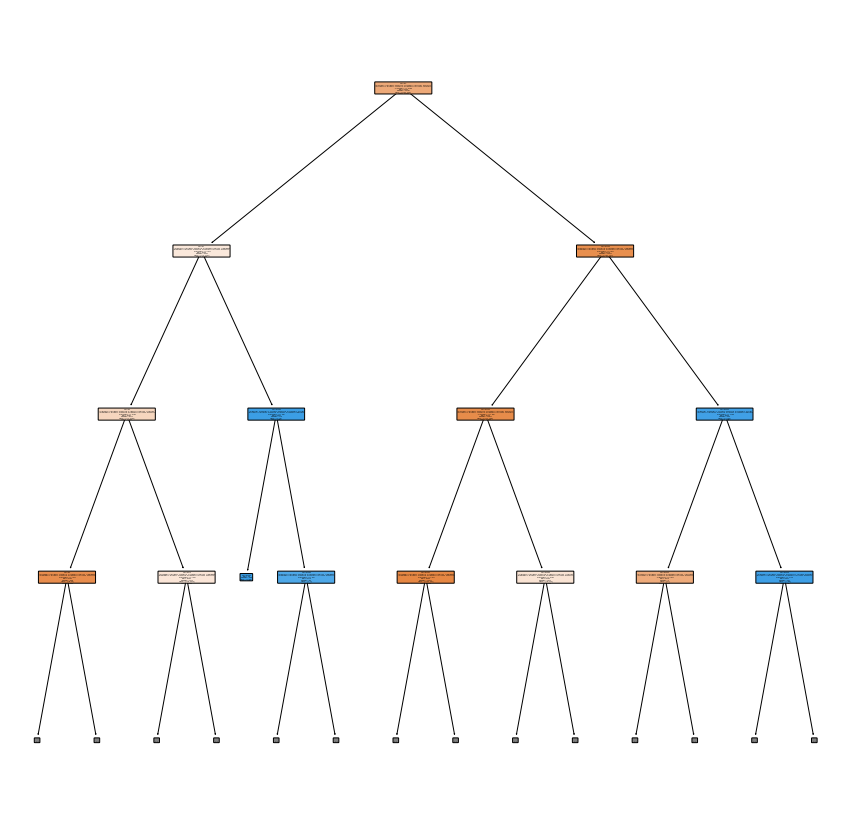

In [18]:
# 4.2 Plot decision tree
# Refer: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree
plt.figure(figsize=(15,15))
plot_tree(
            ct,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = list(X),
            class_names = ["<=50k",">50K"]
            )

plt.show()

In [19]:
ct = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )

DecisionTreeClassifier(criterion='entropy')

<Figure size 1080x1080 with 0 Axes>

[Text(396.0803571428571, 733.86, 'node #0\n[ 0.76416945  0.09005041 -0.32450512 -1.11058976  0.25771087  0.33751001\n -0.27780504 -1.96262077 -1.42233076 -0.14592048 -0.21665953 -1.97918382\n -1.75350962] <= -0.589\nentropy = 0.796\nsamples = 22792\nvalue = [17303, 5489]\nclass = <=50K'),
 Text(194.30357142857142, 570.78, 'node #1\n[ 0.25079578  0.09005041 -0.33706942 -0.33543693 -0.4062122  -0.60838662\n -0.90018084  0.39366753  0.70307135  0.55521353 -0.21665953 -0.03542945\n  0.29156857] <= 0.544\nentropy = 0.993\nsamples = 9244\nvalue = [5079, 4165]\nclass = <=50K'),
 Text(119.57142857142857, 407.70000000000005, 'node #2\n[ 1.05752582  0.09005041  0.79966995 -2.40251115 -0.4062122  -0.1354383\n -0.90018084 -1.96262077  0.70307135 -0.14592048 -0.21665953 -0.03542945\n  0.29156857] <= -0.981\nentropy = 0.972\nsamples = 8474\nvalue = [5071, 3403]\nclass = <=50K'),
 Text(59.785714285714285, 244.62, 'node #3\n[-0.11589969  0.09005041  1.16238173  1.21486874 -0.4062122  -0.60838662\n -0.

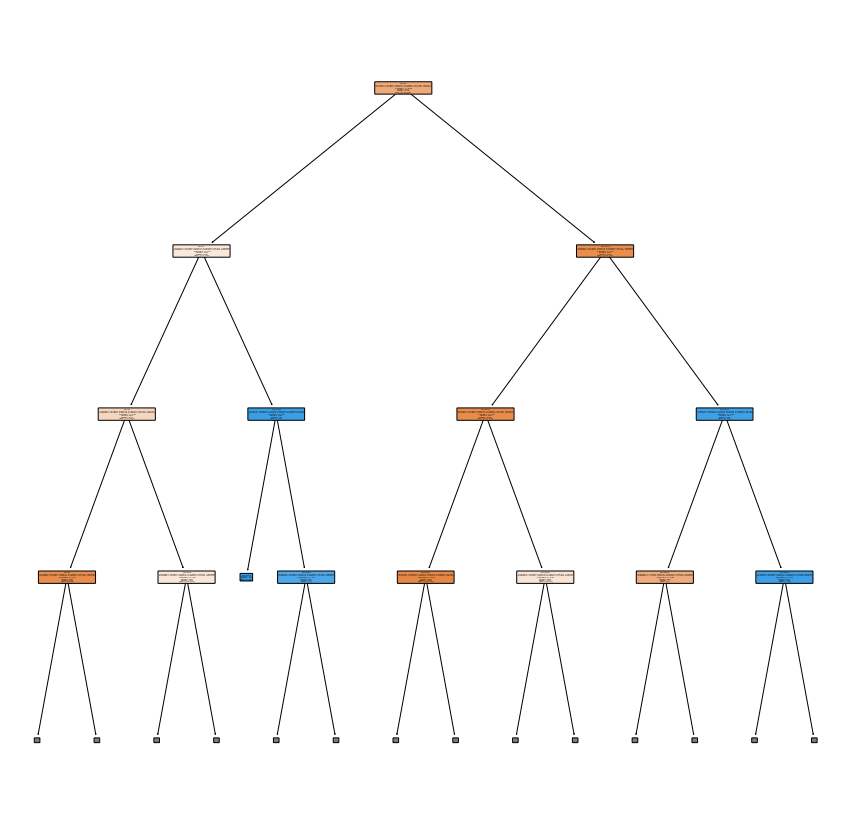

In [20]:
# 5.1
ct.fit(X_train,y_train)

# 5.2
plt.figure(figsize=(15,15))
plot_tree(
            ct,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = list(X),
            class_names = ["<=50K",">50K"]
            )

plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
                                                     X,
                                                     y,
                                                     test_size = 0.3,
                                                     shuffle = True,
                                                     stratify = y
                                                    )

ct1 = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
##
ct1.fit(X_train[2:,:],y_train[2:])

DecisionTreeClassifier(criterion='entropy')

<Figure size 1080x1080 with 0 Axes>

[Text(396.0803571428571, 733.86, 'node #0\n[ 0.76416945  0.09005041 -0.32450512 -1.11058976  0.25771087  0.33751001\n -0.27780504 -1.96262077 -1.42233076 -0.14592048 -0.21665953 -1.97918382\n -1.75350962] <= -0.589\nentropy = 0.796\nsamples = 22790\nvalue = [17302, 5488]\nclass = <=50K'),
 Text(194.30357142857142, 570.78, 'node #1\n[ 0.25079578  0.09005041 -0.33706942 -0.33543693 -0.4062122  -0.60838662\n -0.90018084  0.39366753  0.70307135  0.55521353 -0.21665953 -0.03542945\n  0.29156857] <= 0.544\nentropy = 0.992\nsamples = 9221\nvalue = [5100, 4121]\nclass = <=50K'),
 Text(119.57142857142857, 407.70000000000005, 'node #2\n[ 1.05752582  0.09005041  0.79966995 -2.40251115 -0.4062122  -0.1354383\n -0.90018084 -1.96262077  0.70307135 -0.14592048 -0.21665953 -0.03542945\n  0.29156857] <= -0.981\nentropy = 0.97\nsamples = 8471\nvalue = [5095, 3376]\nclass = <=50K'),
 Text(59.785714285714285, 244.62, 'node #3\n[ 0.0307785   2.15057856 -1.29410611 -0.33543693  0.92163395 -1.3178091\n -0.27

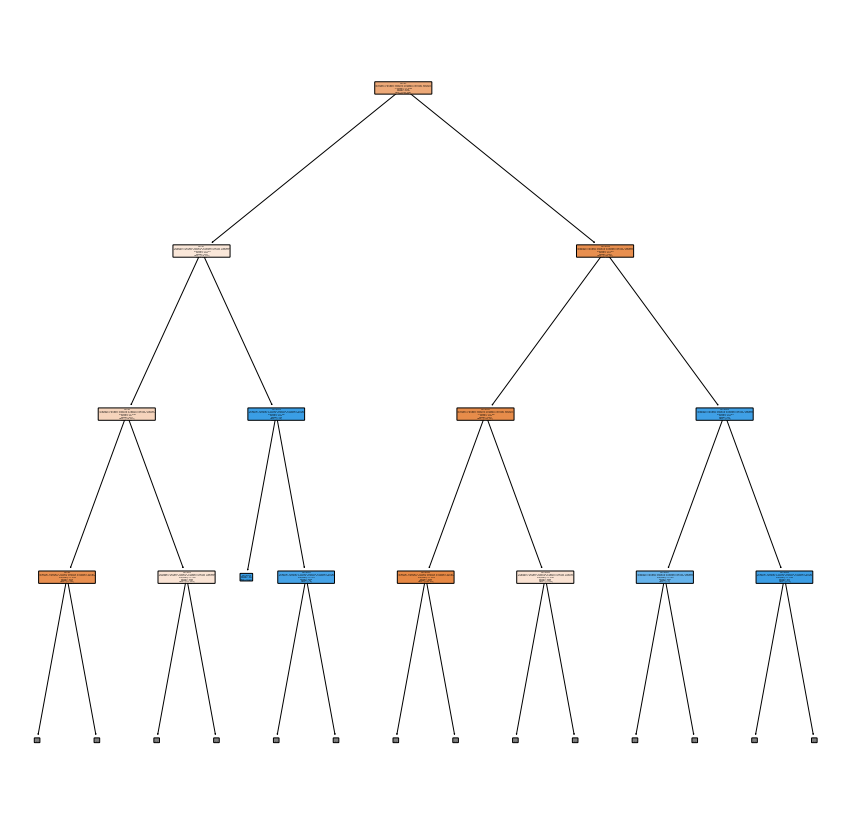

In [22]:
plt.figure(figsize=(15,15))
plot_tree(
            ct1,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = list(X),
            class_names = ["<=50K",">50K"]
            )

plt.show()

In [23]:
# 5.4 Make predictions of test data
y_te = ct.predict(X_test)
np.sum((y_test == y_te))/y_test.size

0.9467703961510902